# Comparison hat function

In [1]:
import numpy as np # for sampling points
import sys # necessary for local path. If you install the library, it can be removed
sys.path.append('..') 
import lipschitz_opt
import matplotlib.pyplot as plt # visualization

In [2]:
import os

In [3]:
from lipschitz_opt.application import Func1D_0, Func1D_composite, FuncMultiD
from lipschitz_opt import piyavskii, doo


ImportError: cannot import name 'FuncMultiD' from 'lipschitz_opt.application' (../lipschitz_opt/application/__init__.py)

In [4]:
n_dim = 3

list_f = []

In [5]:
0.5087024726932778
0.7715311678529033

0.7715311678529033

0.1305668947421107
0.541653475377064
0.4081181092871783


Text(0, 0.5, 'f_i(x)')

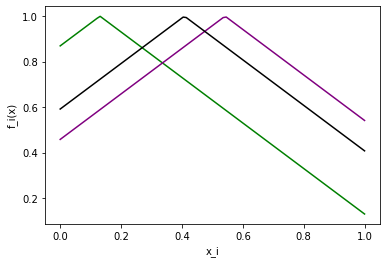

In [6]:
colors=['g', 'purple', 'black']
a = [0.1305668947421107, 0.541653475377064, 0.4081181092871783]
#a = [0.5087024726932778, 0.7715311678529033]
for i in range(n_dim):
    a_0 = a[i]
    print(a_0)
    f_0 = Func1D_0(a=a_0)
    x = np.linspace(f_0.x_min, f_0.x_max, 100) # samples for visualization
    y =f_0(x) # output
    list_f.append(f_0)
    plt.plot(x, y, c=colors[i])
    
    #plt.title('f(x)= {}-{}*|x-{}|^{} for {}<=x<={}'.format(f_0.d, f_0.c, f_0.a, f_0.b, f_0.x_min, f_0.x_max))
plt.xlabel('x_i')
plt.ylabel('f_i(x)')


In [7]:
0.1305668947421107
0.541653475377064
0.4081181092871783

0.4081181092871783

In [8]:
f_multi = FuncMultiD(list_f)

In [9]:
L_inf = sum([f_i.lipschitz() for f_i in f_multi.list_f])
L_1 = max([f_i.lipschitz() for f_i in f_multi.list_f])

In [10]:
n_iter = 100

In [11]:
list_f

In [12]:
L_inf

3.0

# Infinite norm

In [13]:
# Piyav
n_iter=10

In [14]:
results_piyav = piyavskii(f_multi, L_inf, f_multi.x_min, \
                          f_multi.x_max, p=np.inf, \
                          n_iter=n_iter, verbose=1, use_gurobi=False)

0
1


IndexError: list index out of range

In [19]:
results_piyav[0]

array(2.79546832)

In [20]:
results_piyav[-2]

[array(5.09510774),
 array(4.27458731),
 array(4.3313574),
 array(3.96310391),
 array(4.51271281),
 array(3.64901258),
 array(3.29417961),
 array(3.43665345),
 array(2.81722476),
 array(2.79546832)]

In [16]:
results_piyav[-2]

[array(5.09510774),
 array(5.09510774),
 array(5.09510774),
 array(5.09510774),
 array(4.31731331),
 array(4.25587571),
 array(4.19067886),
 array(4.14085416),
 array(3.64660796),
 array(3.62481885)]

In [27]:
results_doo = doo(f_multi.x_min, f_multi.x_max, f_multi, L_inf, \
               p=np.inf, maximize=True,max_iter=n_iter, time=True)

/anaconda3/envs/formal/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [28]:
results_doo[0]

array([3.08033848])

# Convergence

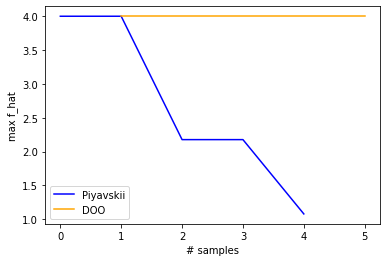

In [18]:
x_sample_doo = [2*(i)+1 for i in range(len(results_doo[-2]))]
x_sample_piyav = range(len(results_piyav[-2]))
plt.plot(x_sample_piyav, results_piyav[-2], c='b')
plt.plot(x_sample_doo, results_doo[-2], c='orange')
plt.xlabel('# samples')
plt.ylabel('max f_hat')
plt.legend(['Piyavskii', 'DOO'])

In [19]:
len(results_piyav[-2])

5

Text(0, 0.5, 'max f_hat')

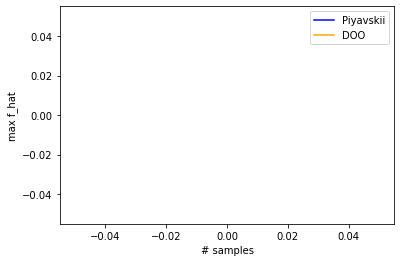

In [20]:
index = 5
plt.plot(x_sample_piyav[index:],results_piyav[-2][index:], c='b')
plt.plot(x_sample_doo[index:], results_doo[-2][index:], c='orange')
plt.xlabel('# samples')
plt.legend(['Piyavskii', 'DOO'])
plt.ylabel('max f_hat')

# Certificate

In [21]:
y_max = [e[0] for e in results_piyav[1]['y']]
y_piyav = np.array([np.max(y_max[:i+1]) for i in range(len(y_max))])

In [22]:
f_max = 3
print(f_max)

3


/anaconda3/envs/formal/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'Evolution of the error given the sample complexity ')

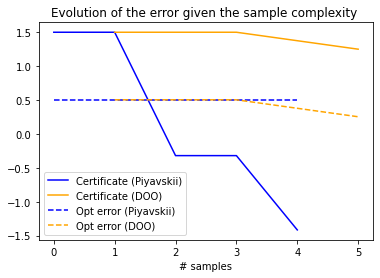

In [23]:
plt.plot(x_sample_piyav, [e_0-e_1 for (e_0, e_1) in zip(results_piyav[-2],y_piyav)], c='b')
plt.plot(x_sample_doo, [e_0-e_1 for (e_0, e_1) in zip(results_doo[4], results_doo[3])], c='orange')
plt.plot(x_sample_piyav, np.array([f_max-e_1 for e_1 in y_piyav[:-1]]), '--', c='b')
plt.plot(x_sample_doo, [f_max-e_1 for e_1 in results_doo[3]], '--', c='orange')
plt.xlabel('# samples')
plt.legend(['Certificate (Piyavskii)', 'Certificate (DOO)', 'Opt error (Piyavskii)', 'Opt error (DOO)'])
plt.title('Evolution of the error given the sample complexity ')

Text(0.5, 1.0, 'Evolution of the error given the sample complexity (semi log scale)')

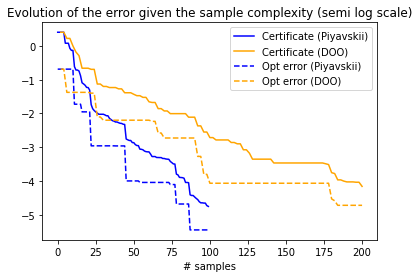

In [20]:
plt.plot(x_sample_piyav, [np.log(e_0-e_1) for (e_0, e_1) in zip(results_piyav[-2],y_piyav)], c='b')
plt.plot(x_sample_doo, [np.log(e_0-e_1) for (e_0, e_1) in zip(results_doo[4], results_doo[3])], c='orange')
plt.plot(x_sample_piyav, [np.log(f_max-e_1) for e_1 in y_piyav[:-1]], '--', c='b')
plt.plot(x_sample_doo, [np.log(f_max-e_1) for e_1 in results_doo[3]], '--', c='orange')
plt.xlabel('# samples')
plt.legend(['Certificate (Piyavskii)', 'Certificate (DOO)', 'Opt error (Piyavskii)', 'Opt error (DOO)'])
plt.title('Evolution of the error given the sample complexity (semi log scale)')

In [1]:
plt.plot(np.log(x_sample_piyav), [e_0-e_1 for (e_0, e_1) in zip(results_piyav[-2],y_piyav)], c='b')
plt.plot(np.log(x_sample_doo), [e_0-e_1 for (e_0, e_1) in zip(results_doo[4], results_doo[3])], c='orange')
plt.plot(np.log(x_sample_piyav), [f_max-e_1 for e_1 in y_piyav[:-1]], '--', c='b')
plt.plot(np.log(x_sample_doo), [f_max-e_1 for e_1 in results_doo[3]], '--', c='orange')
plt.xlabel('log(# samples)')
plt.legend(['Certificate (Piyavskii)', 'Certificate (DOO)', 'Opt error (Piyavskii)', 'Opt error (DOO)'])
plt.title('Evolution of the error given the log-sample complexity ')

NameError: name 'plt' is not defined

/anaconda3/envs/formal/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/formal/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/anaconda3/envs/formal/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/formal/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

Text(0.5, 1.0, 'Evolution of the error given the sample complexity (log scale)')

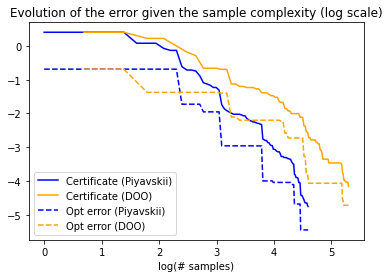

In [22]:
plt.plot(np.log(x_sample_piyav), [np.log(e_0-e_1) for (e_0, e_1) in zip(results_piyav[-2],y_piyav)], c='b')
plt.plot(np.log(x_sample_doo), [np.log(e_0-e_1) for (e_0, e_1) in zip(results_doo[4], results_doo[3])], c='orange')
plt.plot(np.log(x_sample_piyav), [np.log(f_max-e_1) for e_1 in y_piyav[:-1]], '--', c='b')
plt.plot(np.log(x_sample_doo), [np.log(f_max-e_1) for e_1 in results_doo[3]], '--', c='orange')
plt.xlabel('log(# samples)')
plt.legend(['Certificate (Piyavskii)', 'Certificate (DOO)', 'Opt error (Piyavskii)', 'Opt error (DOO)'])
plt.title('Evolution of the error given the sample complexity (log scale)')

# Density

In [23]:
samples_piyav = np.array(results_piyav[1]['x'])

In [24]:
samples_doo = np.array(results_doo[2])

Text(0.5, 1.0, 'Density')

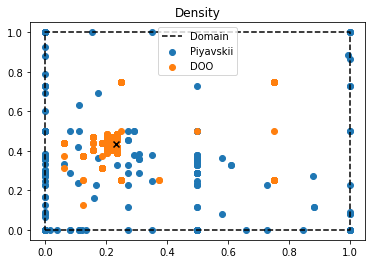

In [104]:
plt.scatter(samples_piyav[:, 0], samples_piyav[:, 1])
plt.scatter(samples_doo[:,0], samples_doo[:, 1])

plt.scatter([list_f[0].a], [list_f[1].a], c='k', marker='x')
plt.plot([0,1, 1, 0, 0], [0, 0, 1, 1, 0], '--', c='k')
plt.legend(['Domain','Piyavskii', 'DOO'])
plt.title('Density')

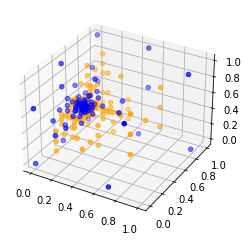

In [25]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
#ax.scatter3D([list_f[0].a], [list_f[1].a], [list_f[2].a], c='k');
ax.scatter3D(samples_piyav[:, 0], samples_piyav[:, 1], samples_piyav[:, 2], c='b');
ax.scatter3D(samples_doo[:, 0], samples_doo[:, 1], samples_doo[:, 2], c='orange');


In [26]:
from sklearn.neighbors import KernelDensity

In [27]:
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, zbins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy, = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins, z.min():z.max():zbins]

    xy_sample = np.vstack([zz.ravel(), yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([z, y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, zz, np.reshape(z, xx.shape)

In [132]:
import numpy as np
import matplotlib.pyplot as plt

x_doo = samples_doo[:, 0]
y_doo = samples_doo[:, 1]
z_doo = samples_doo[:, 2]
bandwidth= 0.3
xx_doo, yy_doo, zz_doo, p_doo = kde2D(x_doo, y_doo, z_doo, bandwidth)



Text(0.5, 0.92, 'DOO density (bandwidth=0.3)')

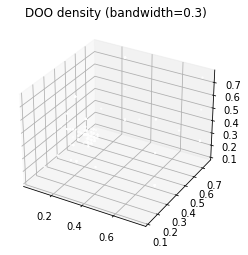

In [137]:
plt.pcolormesh(xx_doo, yy_doo, p_doo)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(x_doo, y_doo, z_doo, s=2, facecolor='white')
plt.title('DOO density (bandwidth={})'.format(bandwidth))

/anaconda3/envs/formal/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0.5, 1.0, 'Piyavskii density (bandwidth=0.3)')

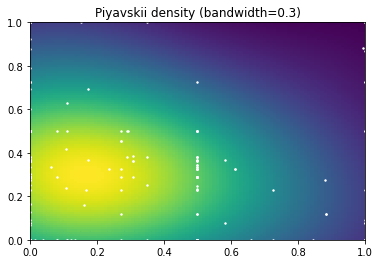

In [108]:
x_piyav = samples_piyav[:, 0]
y_piyav = samples_piyav[:, 1]
bandwidth= 0.3
xx_piyav, yy_piyav, zz_piyav = kde2D(x_piyav, y_piyav, bandwidth)

plt.pcolormesh(xx_piyav, yy_piyav, zz_piyav)
plt.scatter(x_piyav, y_piyav, s=2, facecolor='white')
plt.title('Piyavskii density (bandwidth={})'.format(bandwidth))

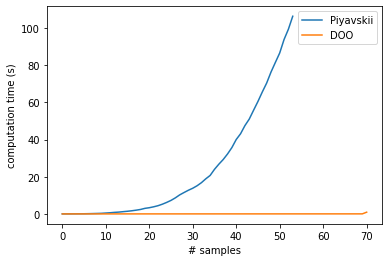

In [77]:
plt.plot(results_piyav[-1])
plt.plot(results_doo[-1])
plt.xlabel('# samples')
plt.ylabel('computation time (s)')
plt.legend(['Piyavskii', 'DOO'])